date
2010-05-05    93
2011-12-05    89
2011-05-05    87
2012-12-05    79
2012-05-05    94
Name: RK, dtype: int64


<ipython-input-66-c92d53c66fd3>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


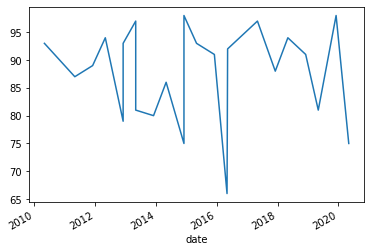

In [66]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
series = read_csv('data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

<ipython-input-67-e2a73ca4afb5>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


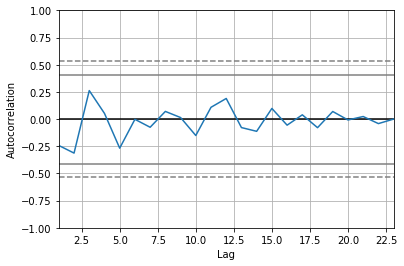

In [67]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
series = read_csv('data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

<ipython-input-68-fbd1cda1792d>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/home/aksultan/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/aksultan/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/aksultan/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided

                               SARIMAX Results                                
Dep. Variable:                     RK   No. Observations:                   23
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -78.931
Date:                Mon, 26 Apr 2021   AIC                            169.862
Time:                        21:12:48   BIC                            176.408
Sample:                             0   HQIC                           171.404
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0040      0.291     -3.446      0.001      -1.575      -0.433
ar.L2         -1.0203      0.564     -1.809      0.070      -2.126       0.085
ar.L3         -0.5369      0.598     -0.898      0.3

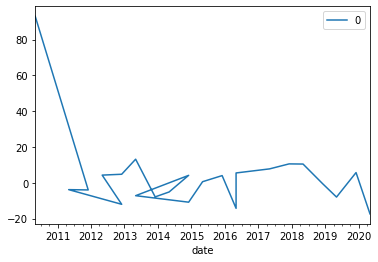

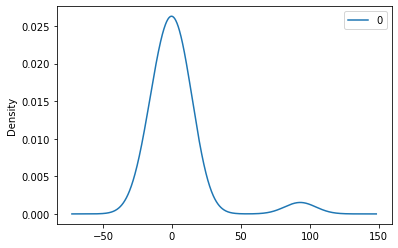

                 0
count  23.00000000
mean    3.17276330
std    21.33240776
min   -17.38608895
25%    -7.53705315
50%     0.60954923
75%     5.59682727
max    93.00000000


In [68]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
series = read_csv('data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()

print(residuals.describe())

<ipython-input-70-d38057ef5ed4>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/home/aksultan/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=81.687094, expected=92.000000
predicted=93.442645, expected=97.000000
predicted=76.000994, expected=88.000000
predicted=75.348007, expected=94.000000
predicted=96.443098, expected=91.000000
predicted=88.758403, expected=81.000000
predicted=90.329771, expected=98.000000
predicted=95.586995, expected=75.000000
Test RMSE: 12.162


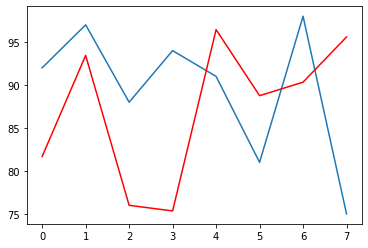

In [70]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()